#importing data frames for analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 


df1 = pd.read_csv('steps.csv', delimiter =';')

df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
importing data frames for analysis

In [3]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
joining datframes

In [5]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


for this, considering a new column mean and loc, using the range of dates to be selected as columns for the mean, we get a new column with value mean steps for each user

In [6]:
df["mean"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1, skipna= True) 
df.head() 

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


afterwards, its possible to find the correlation among three different relevant values, mean, weight, height

In [7]:
corr = df[['mean', 'weight', 'height']].corr()

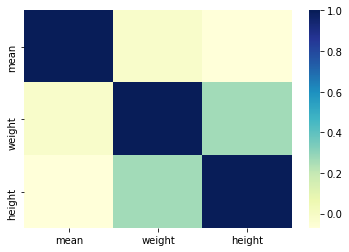

In [16]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

from the matrix plot can be concluded that weight and height are correlated positely. for more height, the tendency is more weight.
The correlation of the mean of steps by user and weight does not show a storng correlation and values remain close to 0.

The relation between two variables, mean and weight shows as follows:

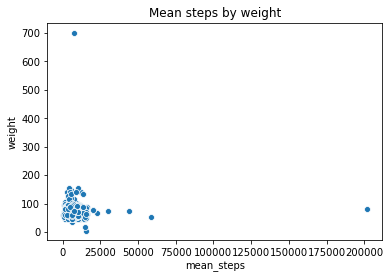

In [9]:
sns.scatterplot(x='mean', y='weight', data=df)
plt.xlabel('mean_steps')
plt.ylabel('weight')
plt.title('Mean steps by weight')
plt.show()

the relation is negative, meaning that with more weight mean_steps tend to decrease

The relation between two variables, mean steps and height shows as follows:

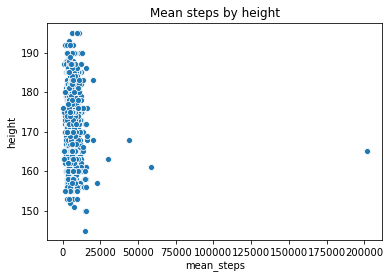

In [10]:
sns.scatterplot(x='mean', y='height', data=df)
plt.xlabel('mean_steps')
plt.ylabel('height')
plt.title('Mean steps by height')
plt.show()


the relation is positive, meaning that with more height mean_steps tend to increase

In [ ]:
the correlation among the variables using the parson method.

In [11]:
corr = corr.dropna() #I will drop the rows with NA, otherwise pearsonr won't work
print(pearsonr(corr['height'], corr['mean']))
print(pearsonr(corr['height'], corr['weight']))


(-0.7699883240044192, 0.44052399588362023)
(0.05879039122766941, 0.9625512809583929)


it can be concluded as follows:
for height and mean, the correlation is negative, values are relevant p < 0.01
for height and weight, the correlation is positive and stronger, with values near 1 : p < 0.01

its also innteresting to see how other variables behave.
For this, age and mean would help to answer my hypothesis:
young people should walk more than older ones?

firstly, we need to get the relevant columns doing a new df.

In [ ]:
df_subsetting = df[["age", "mean"]].dropna()


we can visualize this to get quick conclusions:

Text(0.5, 1.0, 'Mean steps by age')

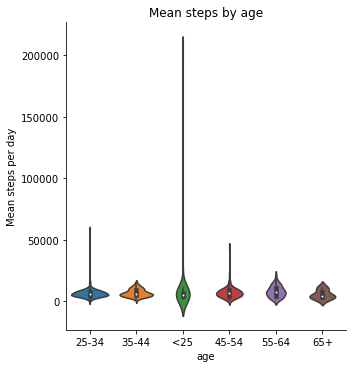

In [18]:
g = sns.catplot(x="age", y="mean",
               data=df_subsetting, kind="violin")
plt.xlabel("age") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by age")

as suppopsed, age plays a relevant factor, being the ranges with major mean of steps from 34 until below 25.

In [22]:
df_subsetting1 = df[["gender", "mean"]].dropna()


lets see who is walking more in average.


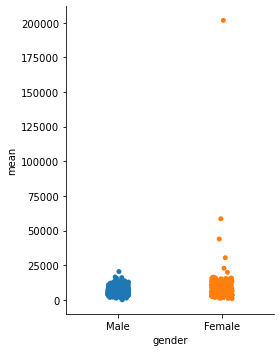

In [21]:
g = sns.catplot(x="gender", y="mean", data=df_subsetting1,
                height=5, aspect=.8)


even though there is an outlier by the females, they are apparently walking more than males.

In [15]:
pd.crosstab(df["gender"], df["education_1"])

ax = sns.barplot(x="gender", y="education_1", data=df)

ValueError: Neither the `x` nor `y` variable appears to be numeric.